# Intelligent Real Estate Valuation System in Boston

## Dataset used: Boston House Prices - Advanced Regression Techniques

## Objective: Create a model that estimates the price of a house based on its features and provides visual insights to help with decision making (e.g. whether it is worth investing, where to buy, etc.).

In [26]:
# Import libraries and dataset
import pandas as pd

# Dataset
base = pd.read_csv('boston.csv')

base.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [34]:
# See basic data structure

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [31]:
# Decribe
base.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


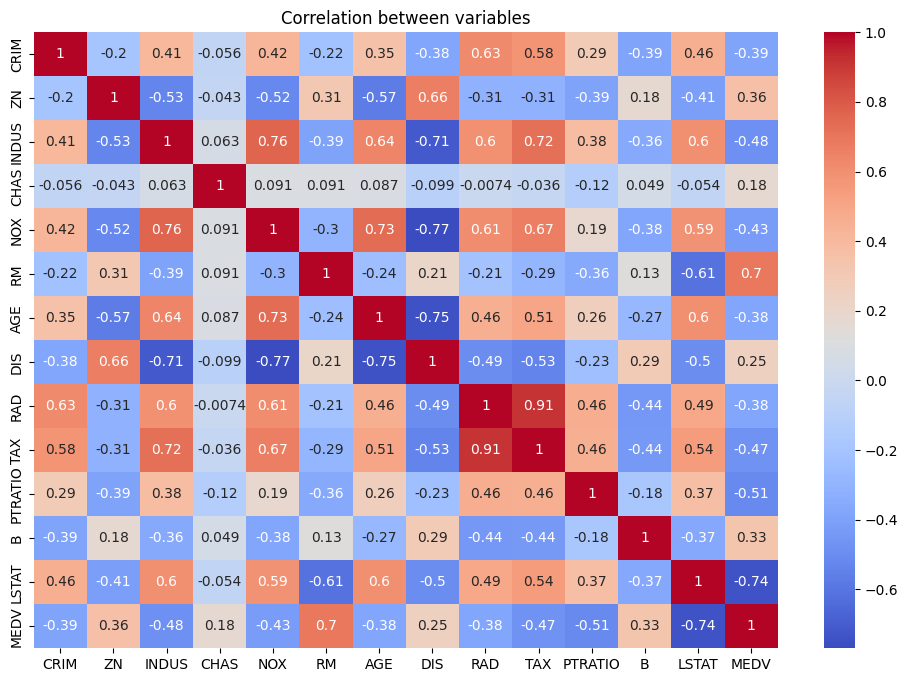

In [37]:
# see price correlation
import seaborn as sns
import matplotlib.pyplot as plt
# heatmap with correlation
plt.figure(figsize=(12, 8))
sns.heatmap(base.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between variables")
plt.show()

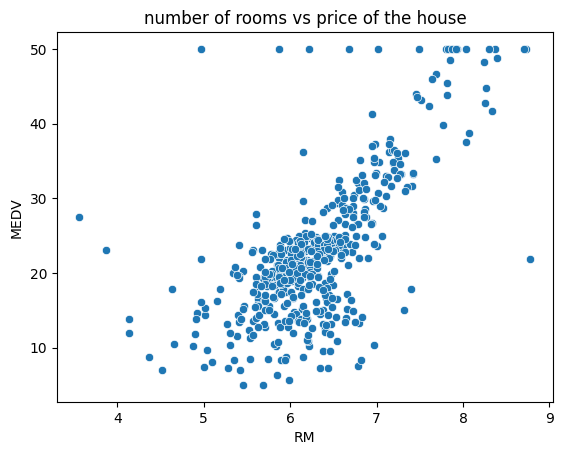

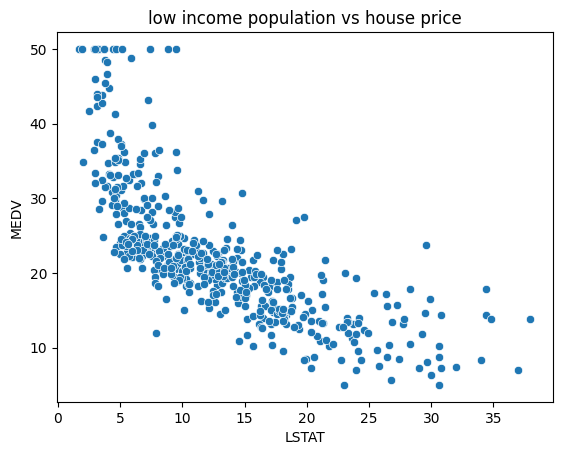

In [41]:
# Gráficos úteis

# RM (número de cômodos) x MEDV
sns.scatterplot(x='RM', y='MEDV', data=base)
plt.title("number of rooms vs price of the house")
plt.show()

# LSTAT (baixa renda) x MEDV
sns.scatterplot(x='LSTAT', y='MEDV', data=base)
plt.title("low income population vs house price")
plt.show()


In [42]:
# regression model
from sklearn.model_selection import train_test_split

X = base.drop('MEDV', axis=1)
y = base['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# create model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# previsão
y_pred = modelo.predict(X_test)

# avaliação
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R²: 0.6687594935356317
RMSE: 4.928602182665339


C:\Users\wesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
# price estimate

def estimar_preco(n_quartos, idade, crime, distancia, baixa_renda):
    dados = pd.DataFrame([[crime, 0, 0, 0, 0, n_quartos, idade, distancia, 0, 0, 0, 0, baixa_renda]], columns=X.columns)
    preco = modelo.predict(dados)[0]
    return round(preco, 2)

# exemplo
print(estimar_preco(n_quartos=3, idade=25, crime=0.2, distancia=2.0, baixa_renda=10))


35.4


In [48]:
cd Data Science/House Prices - Advanced Regression Techniques

[WinError 3] O sistema não pode encontrar o caminho especificado: 'Data Science/House Prices - Advanced Regression Techniques'
C:\Users\wesle\Data Science\House Prices - Advanced Regression Techniques


C:\Users\wesle\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
